# <font color= Orange> Battle of Neighbourhoods (Week 1 and 2) </font>

## 1. Description of the Problem and Discussion of the Background

## A. Introduction

## Prospects of Opening an Indian Restaurant in the City of Toronto, Canada.

<font size = 2> According to a study, Canada contains the worlds's eighth largest Indian diaspora. There has been a 74% rise in the Indian Immigrants since 2001.Not only that, Indians account for one-fourth of Immigrants Population in Canada. Canada is also the third most popular country to pursue Higher studies for Indian students. Toronto is the financial capital of Canada and you can find Indians working in every sector making it one of the best places to set up an Indian Restaurant.</font>

<font size = 2>  We will work trough this project step by step. For this week I shall describe the initial data preparation and future steps for the project. </font>

<font color=purple><font size= 4> 1.Obtain the Data </font></font>

1.a. Name of the Boroughs and Neighbourhoods from web scrapping

1.b. Obtain information about selected Boroughs in Toronto.

1.c. Use Foresquare Data to obtain info about restaurants.

<font color=purple><font size= 4>2.Data Visualization and Some Simple Statistical Analysis. </font></font>

<font color=purple><font size= 4>3.Analysis Using Clustering, Specially K-Means Clustering. </font></font>

3.a. Maximize the number of clusters.

3.b. Visualization using Chloropleth Map

<font color=purple><font size= 4>4.Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant.</font>
</font>

<font color=purple><font size= 4>5.Inference From these Results and related Conclusions. </font>

<font color=purple><font size= 4>Target Audience</font></font>

1.Business personnel who wants to invest in or open a restaurant. \
2.This analysis will be a comprehensive guide to start or expand restaurants targeting the large pool of office workers in Toronto. \
3.New graduates, to find reasonable lunch/breakfast place close to office. 

This analysis will give an idea, how benificial it is to open a restaurant and what are the pros and cons of this business.


## <font color= black> 2. Initial Data Preparation (Week 1)
<font size= 2> 2.1. Get The Names of Boroughs, Neighbourhoods and Land Market Price from Wikipedia. 

<font size= 2> 2.2. Processing the Information From Wiki to select areas of interest. 
    
<font size= 2> 2.3. Get the Coordinates of the Boroughs.

I have described these steps detailed as a part of Week 1 Assignment in a python notebook, and also made a more comprehensible .pdf file.

So here we start with using Foursquare and use many Exploratory Data Analysis Techniques to learn from data and visualize to strengthen our understanding.

### Importing Libraries for data analysis.

In [1]:

import pandas as pd # library for data analsysis
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium

### 2.1. Get The Names of Boroughs, Neighbourhoods and Land Market Price from Wikipedia. 

In [3]:
tpc1 = pd.read_csv(r'C:\Users\Nidhi Shetty\Desktop\TorontoPC.csv')
tpc1.head()

,Postal Code,Borough,Neighborhood,Market_Value_per Sq.ft
0,M9Z,Not assigned,NaN,NaN
1,M9Y,Not assigned,NaN,NaN
2,M9X,Not assigned,NaN,NaN
3,M9W,Etobicoke,Northwest,NaN
4,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...,NaN


In [4]:
tpc2= pd.read_csv(r'C:\Users\Nidhi Shetty\Desktop\Geospatial_Coordinates.csv')
tpc2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:

#Replacing the "Not assigned" values in Column 'Borough' to the standard NaN.
tpc1["Borough"].replace("Not assigned", np.nan, inplace = True)

#Dropping the rows with NaN values in the 'Borough'.
tpc1.dropna(subset=["Borough"], axis=0, inplace=True)

# reset index, because we dropped rows
tpc1.reset_index(drop=True, inplace=True)


In [8]:
#Replacing the '/' by ',' .
tpc1['Neighborhood']=tpc1['Neighborhood'].str.replace('/', ',')
tpc1.head()

,Postal Code,Borough,Neighborhood,Market_Value_per Sq.ft
0,M9W,Etobicoke,Northwest,NaN
1,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",NaN
2,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",NaN
3,M9P,Etobicoke,Westmount,NaN
4,M9N,York,Weston,NaN


In [105]:
#Merging the two dataframes using 'inner' join operator
tpcfinal= tpc1.merge(tpc2, how ='inner')
tpcfinal.head()
tpcfinal.rename(columns={'Neighborhood': 'Neighbourhood'}, inplace=True)
tpcfinal.head()

,Postal Code,Borough,Neighbourhood,Market_Value_per Sq.ft,Latitude,Longitude
0,M9W,Etobicoke,Northwest,NaN,43.706748,-79.594054
1,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",NaN,43.739416,-79.588437
2,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",NaN,43.688905,-79.554724
3,M9P,Etobicoke,Westmount,NaN,43.696319,-79.532242
4,M9N,York,Weston,NaN,43.706876,-79.518188


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(tpcfinal['Borough'].unique()),
        tpcfinal.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


### 2.3. Get the Coordinates of Toronto City.

In [14]:
address = 'Toronto City, CA'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate Toronto City are {}, {}.'.format(latitude, longitude))

The geographical coordinate Toronto City are 43.6534817, -79.3839347.


### 2.2. Processing the Information From Wiki to select areas of interest.

In [18]:
#Next job is to select boroughs containing the word Toronto

# check the borough names at first 
unique_boroughs = list(tpcfinal.Borough.unique())
print(unique_boroughs)
# select boroughs with word Toronto in it
Tor_boroughs = ['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']

['Etobicoke', 'York', 'North York', 'East Toronto', 'Mississauga', 'Downtown Toronto', 'West Toronto', 'Central Toronto', 'East York', 'Scarborough']


### 2.4 Creating a data frame and a map for Toronto.

In [111]:
Tor_series = tpcfinal["Borough"].isin(Tor_boroughs)
Toronto = tpcfinal[Tor_series]



Toronto.index = np.arange(0, len(Toronto))
print ("Shape of Dataframe with boroughs containing the word Toronto: ", Toronto.shape)
Toronto.head()

Shape of Dataframe with boroughs containing the word Toronto:  (39, 6)


,Postal Code,Borough,Neighbourhood,Market_Value_per Sq.ft,Latitude,Longitude
0,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",200.0,43.662301,-79.389494
2,M6S,West Toronto,"Runnymede , Swansea",100.0,43.651571,-79.484450
3,M6R,West Toronto,"Parkdale , Roncesvalles",100.0,43.648960,-79.456325
4,M6P,West Toronto,"High Park , The Junction South",100.0,43.661608,-79.464763


In [21]:
import folium
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

# <font color= orange> Week 2  Using Foursquare API:</font> 
Here we make use of FOURSQUARE API to explore 100 venues within a radius of 500 m in and around Toronto.

To decide which Borough is the best for opening a restaurant, we will explore the areas around the Main Toronto city which is divided into boroughs named East Toronto, West Toronto, Central Toronto and Downtown Toronto. Given below are the steps:

1.Create the get request url (Foursquare ID and Secret are necessary): \
2.Assign Number of Venues as 100. \
3.Radius of Search Would be 500 m. \
4.Create a json from the request object (Need requests Module). \
5.Create the lists Containing all the information. \
6.From the lists create the dataframe.



In [22]:
CLIENT_ID = 'XEVZEKV51VERIAIPJTUIAQZ31YJJEYD3EI1S50MVVDH2LC0E' # your Foursquare ID
CLIENT_SECRET = 'F2L40HYTEBHM2HJIR3VYQSIRVYS0R4TVVQ5EABGXXWXTP53H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XEVZEKV51VERIAIPJTUIAQZ31YJJEYD3EI1S50MVVDH2LC0E
CLIENT_SECRET:F2L40HYTEBHM2HJIR3VYQSIRVYS0R4TVVQ5EABGXXWXTP53H


In [40]:
radius = 500
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
 
  # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url # display URL     

'https://api.foursquare.com/v2/venues/explore?&client_id=XEVZEKV51VERIAIPJTUIAQZ31YJJEYD3EI1S50MVVDH2LC0E&client_secret=F2L40HYTEBHM2HJIR3VYQSIRVYS0R4TVVQ5EABGXXWXTP53H&v=20180605&ll=43.67635739999999,-79.2930312&radius=500&limit=100'

In [43]:
results = requests.get(url).json()

In [48]:
radius = 500
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            500, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighbourhood', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


### Using the function above, lets create a dataframe that has venues around the neighbourhood.

In [157]:
Toronto_venues = getNearbyVenues(names=Toronto['Neighbourhood'],
                                   latitudes=Toronto['Latitude'],
                                   longitudes=Toronto['Longitude']
                                  )

Business reply mail Processing Centre
Queen's Park , Ontario Provincial Government
Runnymede , Swansea
Parkdale , Roncesvalles
High Park , The Junction South
Brockton , Parkdale Village , Exhibition Place
Little Portugal , Trinity
Dufferin , Dovercourt Village
Christie
First Canadian Place , Underground city
Stn A PO Boxes
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Kensington Market , Chinatown , Grange Park
University of Toronto , Harbord
The Annex , North Midtown , Yorkville
Forest Hill North & West
Roselawn
Commerce Court , Victoria Hotel
Toronto Dominion Centre , Design Exchange
Harbourfront East , Union Station , Toronto Islands
Richmond , Adelaide , King
Central Bay Street
Berczy Park
St. James Town
Garden District , Ryerson
Regent Park , Harbourfront
Church and Wellesley
St. James Town , Cabbagetown
Rosedale
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
Moore Park , Summerhill East
Davi

In [51]:
print ("Shape of the dataframe of Venues in Toronto: ",  Toronto_venues.shape)
Toronto_venues.tail(4)

Shape of the dataframe of Venues in Toronto:  (1604, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1600,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1601,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1602,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
1603,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [152]:
Toronto_Coordinate_merged = Toronto

#merge the inital Toronto Dataframe with Sorted Most Visited places for each neighborhood

Toronto_Coordinate_merged = pd.merge(Toronto_Coordinate_merged,Toronto_venues, on="Neighbourhood", how="outer") 

Toronto_Coordinate_merged.head()

,Postal Code,Borough,Neighbourhood,Market_Value_per Sq.ft,Latitude,Longitude,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Rorschach Brewing Co.,43.663483,-79.319824,Brewery
1,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Leslieville Farmers Market,43.664901,-79.319784,Farmers Market
2,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,The Sidekick,43.664484,-79.325162,Comic Shop
3,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Chino Locos,43.664653,-79.325584,Burrito Place
4,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Queen Margherita Pizza,43.664685,-79.324164,Pizza Place


[23, 297, 31, 40]


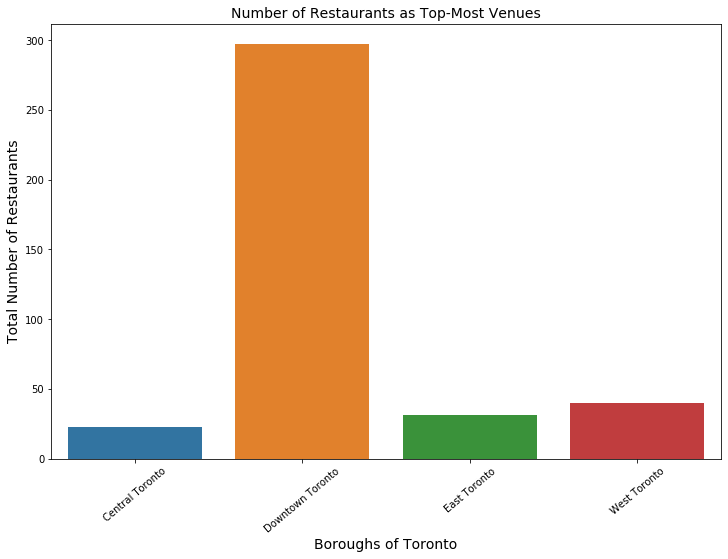

In [153]:
#try groupby to play with restaurant 
Tor_Venues_restaurant = Toronto_Coordinate_merged.groupby(['Borough'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tor_Venues_restaurant_df = Tor_Venues_restaurant.to_frame().reset_index()
Tor_Venues_restaurant_df.columns = ['Borough', 'Number of Restaurant']
#Tor_Venues_restaurant_df.columns = ['Borough', 'Number of Restaurant']
#print (type(Tor_Venues_restaurant_df))
Tor_Venues_restaurant_df.index = np.arange(1, len(Tor_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Tor_Venues_restaurant_df.shape)
#print (Tor_Venues_restaurant_df.head(5))
#print (type(Tor_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tor_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Borough', y='Number of Restaurant', data=Tor_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Boroughs of Toronto", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [53]:
#Number of Unique Categories from all the venues
print ("Unique categories in all the venues: ", len(Toronto_venues['Venue Category'].unique()))

Unique categories in all the venues:  232


In [54]:
#Let's explore what are some of these categories
print ("Few of the categories: \n", Toronto_venues['Venue Category'].unique()[50:60])

Few of the categories: 
 ['Butcher' 'Grocery Store' 'Dog Run' 'Cuban Restaurant' 'Movie Theater'
 'Eastern European Restaurant' 'Gift Shop' 'Breakfast Spot' 'Gastropub'
 'Flea Market']


In [56]:
#Begin the analyses of Each Neighbourhood

Toronto_venues_OneHot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# Add the neighbourhood column
Toronto_venues_OneHot['Neighbourhood'] = Toronto_venues['Neighbourhood']

print ("Shape of the dataframe: Column number should match 1 + no. of unique venue category: ", Toronto_venues_OneHot.shape)
print (Toronto_venues_OneHot.head(3))

# the neighbourhood column is at last, which is not good for understanding the dataframe at a glance. 
# So bring it at first
Tor_one_hot_Col_list = Toronto_venues_OneHot.columns.to_list() # obtain the list of column names
Tor_one_hot_Col_list = Tor_one_hot_Col_list[-1:] + Tor_one_hot_Col_list[:-1] # bring the last element of list to first


Toronto_venues_OneHot=Toronto_venues_OneHot[Tor_one_hot_Col_list]

print (Toronto_venues_OneHot.head(3))

Shape of the dataframe: Column number should match 1 + no. of unique venue category:  (1604, 233)
   Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                  0        0                   0             0   
1                  0        0                   0             0   
2                  0        0                   0             0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0             0         0            0           0                    0   
1             0         0            0           0                    0   
2             0         0            0           0                    0   

   Asian Restaurant  At

In [60]:
#Group Rows by Neighbourhood¶
Toronto_grouped = Toronto_venues_OneHot.groupby('Neighbourhood').mean().reset_index()

print ("Shape of the Grouped Dataframe by Neighbourhood: ", Toronto_grouped.shape)
print ("make sense as there are %d neighbourhoods"%(Toronto.shape[0]))

Toronto_grouped.head(3)

Shape of the Grouped Dataframe by Neighbourhood:  (39, 233)
make sense as there are 39 neighbourhoods


,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.000000,0.017544,0.0,0.017544,0.035088,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.035088,0.0,0.0,0.0,0.035088,0.0,0.0,0.0,0.000000,0.017544,0.052632,0.070175,0.0,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.000000,0.0,0.017544,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.017544,0.000000,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.017544,0.000000,0.0,0.0,0.0,0.0,

In [61]:
#Let's Create a Data Frame from the top 7 common venues of each neighbourhood

# Function to sort the venues in descending order 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False) # sort the dataframe by all column 
    
    return row_categories_sorted.index.values[0:num_top_venues] # return the array representing the data in the index

num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(3)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Bakery,Cheese Shop,Restaurant,Beer Bar
1,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Grocery Store,Pet Store,Performing Arts Venue
2,Business reply mail Processing Centre,Light Rail Station,Yoga Studio,Recording Studio,Restaurant,Burrito Place,Auto Workshop,Fast Food Restaurant


In [65]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Toronto_venues_restaurant = Toronto_venues[Toronto_venues['Venue Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Toronto_venues_restaurant.index = np.arange(1, len(Toronto_venues_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Toronto_venues_restaurant.shape)
Toronto_venues_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (391, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Business reply mail Processing Centre,43.662744,-79.321558,Chick-n-Joy,43.665181,-79.321403,Fast Food Restaurant
2,Business reply mail Processing Centre,43.662744,-79.321558,The Green Wood,43.664728,-79.324117,Restaurant
3,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant


### See the Most Frequently Visited Restaurants in Toronto.

In [76]:
import folium
# create map of Toronto using latitude and longitude values
Toronto_restaurants = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, poi, distr in zip(Toronto_venues_restaurant['Venue Latitude'], Toronto_venues_restaurant['Venue Longitude'], Toronto_venues_restaurant['Venue'], Toronto_venues_restaurant['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Toronto_restaurants) 
 
    
Toronto_restaurants


In [77]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Toronto_venues_restaurant['Venue Category'].unique())))
## We can check some of the categories randomly  
print (Toronto_venues_restaurant[['Venue Category']][70:75])

There are 43 unique categories.
              Venue Category
71          Asian Restaurant
72  Mediterranean Restaurant
73        Seafood Restaurant
74      Fast Food Restaurant
75          Asian Restaurant


### We have seen that there are 43 unique categories of the venues.Let's see the Frequency of Each Category.

In [78]:
print(Toronto_venues_restaurant['Venue Category'].value_counts())

Restaurant                         57
Italian Restaurant                 42
Japanese Restaurant                34
Sushi Restaurant                   24
American Restaurant                22
Seafood Restaurant                 22
Thai Restaurant                    19
Vegetarian / Vegan Restaurant      17
Greek Restaurant                   14
Fast Food Restaurant               13
Asian Restaurant                   11
Mexican Restaurant                 11
French Restaurant                  10
New American Restaurant             8
Middle Eastern Restaurant           8
Vietnamese Restaurant               7
Indian Restaurant                   7
Chinese Restaurant                  6
Comfort Food Restaurant             6
Mediterranean Restaurant            5
Ramen Restaurant                    4
Caribbean Restaurant                4
Gluten-free Restaurant              4
Latin American Restaurant           4
Modern European Restaurant          3
Eastern European Restaurant         3
Portuguese R

### Create a Data-frame with the 10 Most Frequently visited restaurants.

In [79]:
# create a dataframe of top 10 categories
Toronto_venues_restaurant_Top10 = Toronto_venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Toronto_venues_restaurant_Top10= Toronto_venues_restaurant_Top10.reset_index()

Toronto_venues_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Toronto_venues_restaurant_Top10

,Venue_Category,Frequency
0,Restaurant,57
1,Italian Restaurant,42
2,Japanese Restaurant,34
3,Sushi Restaurant,24
4,American Restaurant,22
5,Seafood Restaurant,22
6,Thai Restaurant,19
7,Vegetarian / Vegan Restaurant,17
8,Greek Restaurant,14
9,Fast Food Restaurant,13


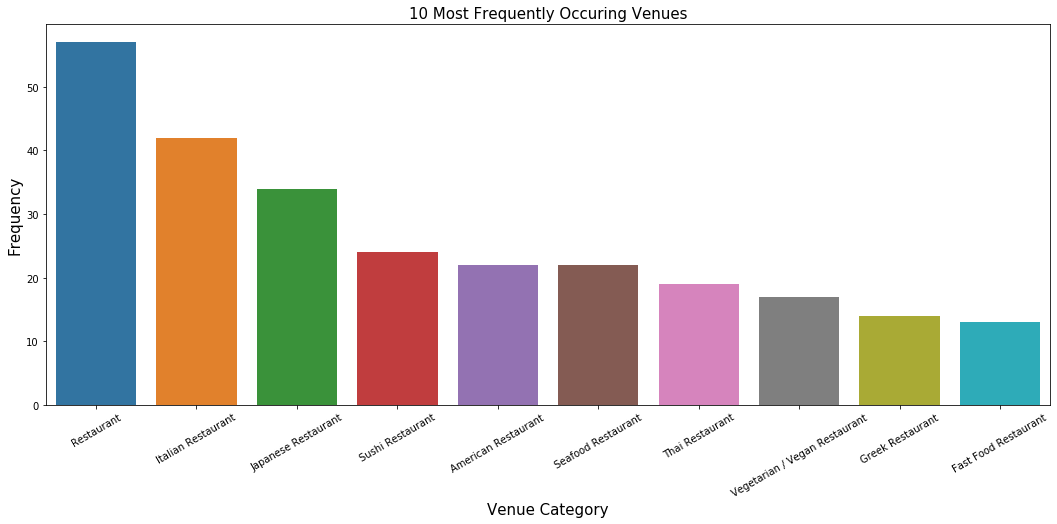

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Toronto_venues_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [87]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Toronto_Venues_onehot = pd.get_dummies(Toronto_venues_restaurant[['Venue Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Toronto_Venues_onehot['Neighbourhood'] = Toronto_venues_restaurant['Neighbourhood'] 

### move district column to the first column
fixed_columns = [Toronto_Venues_onehot.columns[-1]] + list(Toronto_Venues_onehot.columns[:-1])
Toronto_Venues_onehot = Toronto_Venues_onehot[fixed_columns]
##Toronto_Venues_onehot.head(3)

In [88]:
Toronto_Venues_Grouped = Toronto_Venues_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_Venues_Grouped.index = np.arange(1, len(Toronto_Venues_Grouped)+1)
Toronto_Venues_Grouped

,Neighbourhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Berczy Park,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.0000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.166667,0.000000,0.000000,0.083333,0.00,0.083333,0.000000
2,"Brockton , Parkdale Village , Exhibition Place",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Business reply mail Processing Centre,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Central Bay Street,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.210526,0.105263,0.052632,0.000000,0.052632,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.052632,0.000000,0.105263,0.00,0.052632,0.000000
5,Christie,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Church and Wellesley,0.04,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.200000,0.000000,0.000000,0.080000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.120000,0.000000,0.200000,0.000000,0.040000,0.04,0.000000,0.000000
7,"Commerce Court , Victoria Hotel",0.00,0.133333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.100000,0.100000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.233333,0.100000,0.000000,0.000000,0.066667,0.00,0.066667,0.000000
8,Davisville,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,

In [89]:
Num_top_venues = 5

for places in Toronto_Venues_Grouped['Neighbourhood']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Toronto_Venues_Grouped[Toronto_Venues_Grouped['Neighbourhood'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Berczy Park%%%%%%%%
                         Venue  Freq
0           Seafood Restaurant  0.17
1                   Restaurant  0.17
2  Eastern European Restaurant  0.08
3             Greek Restaurant  0.08
4            French Restaurant  0.08
5        Portuguese Restaurant  0.08
6      Comfort Food Restaurant  0.08


%%%%%%%%%Brockton , Parkdale Village , Exhibition Place%%%%%%%%
                       Venue  Freq
0                 Restaurant   0.5
1         Italian Restaurant   0.5
2          Afghan Restaurant   0.0
3        Moroccan Restaurant   0.0
4          Korean Restaurant   0.0
5  Latin American Restaurant   0.0
6   Mediterranean Restaurant   0.0


%%%%%%%%%Business reply mail Processing Centre%%%%%%%%
                       Venue  Freq
0       Fast Food Restaurant   0.5
1                 Restaurant   0.5
2          Afghan Restaurant   0.0
3        Moroccan Restaurant   0.0
4          Korean Restaurant   0.0
5  Latin American Restaurant   0.0
6   Mediterranean Restauran

In [91]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]






num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Toronto_top10_venues_sorted = pd.DataFrame(columns=columns)
Toronto_top10_venues_sorted['Neighbourhood'] = Toronto_Venues_Grouped['Neighbourhood']

for ind in np.arange(Toronto_Venues_Grouped.shape[0]):
    Toronto_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_Venues_Grouped.iloc[ind, :], num_top_venues)

    
Toronto_top10_venues_sorted.index = np.arange(1, len(Toronto_top10_venues_sorted)+1)
Toronto_top10_venues_sorted.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Berczy Park,Seafood Restaurant,Restaurant,Thai Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,Japanese Restaurant,French Restaurant,Eastern European Restaurant,Comfort Food Restaurant
2,"Brockton , Parkdale Village , Exhibition Place",Italian Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
3,Business reply mail Processing Centre,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
4,Central Bay Street,Italian Restaurant,Thai Restaurant,Japanese Restaurant,Indian Restaurant,Falafel Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Korean Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant
5,Christie,Italian Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In [154]:
Toronto_Coordinate_merged = Toronto

#merge the inital Toronto Dataframe with Sorted Most Visited places for each neighborhood

Toronto_Coordinate_merged = pd.merge(Toronto_Coordinate_merged,Toronto_venues, on="Neighbourhood", how="outer") 

Toronto_Coordinate_merged.head()

,Postal Code,Borough,Neighbourhood,Market_Value_per Sq.ft,Latitude,Longitude,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Rorschach Brewing Co.,43.663483,-79.319824,Brewery
1,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Leslieville Farmers Market,43.664901,-79.319784,Farmers Market
2,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,The Sidekick,43.664484,-79.325162,Comic Shop
3,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Chino Locos,43.664653,-79.325584,Burrito Place
4,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,43.662744,-79.321558,Queen Margherita Pizza,43.664685,-79.324164,Pizza Place


[23, 297, 31, 40]


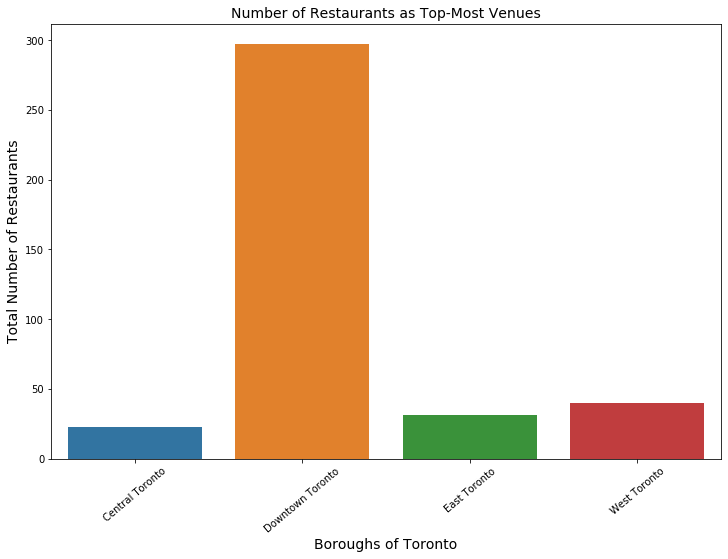

In [155]:
#try groupby to play with restaurant 
Tor_Venues_restaurant = Toronto_Coordinate_merged.groupby(['Borough'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tor_Venues_restaurant_df = Tor_Venues_restaurant.to_frame().reset_index()
Tor_Venues_restaurant_df.columns = ['Borough', 'Number of Restaurant']
#Tor_Venues_restaurant_df.columns = ['Borough', 'Number of Restaurant']
#print (type(Tor_Venues_restaurant_df))
Tor_Venues_restaurant_df.index = np.arange(1, len(Tor_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Tor_Venues_restaurant_df.shape)
#print (Tor_Venues_restaurant_df.head(5))
#print (type(Tor_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tor_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='Borough', y='Number of Restaurant', data=Tor_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Boroughs of Toronto", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

### Clustering the Toronto Neighborhoods using K-Means

In [98]:


###K Means Clustering
# set number of clusters
kclusters = 5

Toronto_grouped_clustering = Toronto_Venues_Grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5])

Check the 5 Cluster labels : [1 2 3 1 2]


In [112]:

Toronto_Coordinate_Cluster_merged = Toronto

#merge the inital Toronto Dataframe with Sorted Most Visited places for each neighborhood

Toronto_Coordinate_Cluster_merged = pd.merge(Toronto_Coordinate_Cluster_merged,Toronto_top10_venues_sorted, on="Neighbourhood", how="outer") 

Toronto_Coordinate_Cluster_merged.head()

,Postal Code,Borough,Neighbourhood,Market_Value_per Sq.ft,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M7Y,East Toronto,Business reply mail Processing Centre,90.0,43.662744,-79.321558,3.0,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
1,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",200.0,43.662301,-79.389494,1.0,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Cuban Restaurant,Fast Food Restaurant,Falafel Restaurant
2,M6S,West Toronto,"Runnymede , Swansea",100.0,43.651571,-79.484450,1.0,Italian Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Falafel Restaurant,Latin American Restaurant,Cuban Restaurant,Filipino Restaurant,Fast Food Restaurant
3,M6R,West Toronto,"Parkdale , Roncesvalles",100.0,43.648960,-79.456325,2.0,Cuban Restaurant,Italian Restaurant,Restaurant,Eastern European Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,M6P,West Toronto,"High Park , The Junction South",100.0,43.661608,-79.464763,4.0,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Vietnamese Restaurant,Doner Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant


In [114]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_Coordinate_Cluster_merged['Latitude'], 
                                  Toronto_Coordinate_Cluster_merged['Longitude'], 
                                  Toronto_Coordinate_Cluster_merged['Borough'], 
                                  Toronto_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters
 

In [122]:
# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Borough = ['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']

# add markers to the map
for lat, lon, poi, cluster in zip(Toronto_Coordinate_Cluster_merged['Latitude'], 
                                  Toronto_Coordinate_Cluster_merged['Longitude'], 
                                  Toronto_Coordinate_Cluster_merged['Borough'], 
                                  Toronto_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Borough.index(poi)]*0.5,
         popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [134]:
Toronto_Cluster1 = Toronto_Coordinate_Cluster_merged.loc[Toronto_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Toronto_Coordinate_Cluster_merged.columns[[1] + list(range(4, Toronto_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Toronto_Cluster1.shape[0]))
Toronto_Cluster1

No of Neighbourhood in Cluster Label 0: 4


,Borough,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,West Toronto,43.669005,-79.442259,0.0,Middle Eastern Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
12,Downtown Toronto,43.653206,-79.400049,0.0,Vietnamese Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Belgian Restaurant,Japanese Restaurant,Filipino Restaurant,Caribbean Restaurant,Comfort Food Restaurant,Doner Restaurant,Ethiopian Restaurant
14,Central Toronto,43.672710,-79.405678,0.0,Indian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Asian Restaurant,Eastern European Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
35,East Toronto,43.659526,-79.340923,0.0,American Restaurant,Comfort Food Restaurant,Middle Eastern Restaurant,Thai Restaurant,Seafood Restaurant,Italian Restaurant,Latin American Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [144]:
Toronto_Cluster2 = Toronto_Coordinate_Cluster_merged.loc[Toronto_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Toronto_Coordinate_Cluster_merged.columns[[1] + list(range(4, Toronto_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Toronto_Cluster2.shape[1]))
Toronto_Cluster2

No of Neighbourhood in Cluster Label 1: 14


,Borough,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,43.662301,-79.389494,1.0,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Cuban Restaurant,Fast Food Restaurant,Falafel Restaurant
2,West Toronto,43.651571,-79.484450,1.0,Italian Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Falafel Restaurant,Latin American Restaurant,Cuban Restaurant,Filipino Restaurant,Fast Food Restaurant
6,West Toronto,43.647927,-79.419750,1.0,Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,New American Restaurant,French Restaurant
9,Downtown Toronto,43.648429,-79.382280,1.0,Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Brazilian Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant
10,Downtown Toronto,43.646435,-79.374846,1.0,Seafood Restaurant,Restaurant,Italian Restaurant,Japanese Restaurant,French Restaurant,American Restaurant,Thai Restaurant,Fast Food Restaurant,Portuguese Restaurant,Vegetarian / Vegan Restaurant
13,Downtown Toronto,43.662696,-79.400049,1.0,Italian Restaurant,Japanese Restaurant,Restaurant,French Restaurant,Sushi Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Filipino Restaurant,Fast Food Restaurant
17,Downtown Toronto,43.648198,-79.379817,1.0,Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Latin American Restaurant,Asian Restaurant
18,Downtown Toronto,43.647177,-79.381576,1.0,Restaurant,Japanese Restaurant,American Restaurant,Seafood Restaurant,Italian Restaurant,Asian Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant
19,Downtown Toronto,43.640816,-79.381752,1.0,Restaurant,Italian Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,New American Restaurant,Chinese Restaurant,Seafood Restaurant,Sushi Restaurant,Eastern European Restaurant
20,Downtown Toronto,43.650571,-79.384568,1.0,Restaurant,Thai Restaurant,American Restaurant,Sushi Restaurant,Seafood Restaurant,Modern European Restaurant,Gluten-free Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Mediterranean Restaurant


In [145]:
Toronto_Cluster3 = Toronto_Coordinate_Cluster_merged.loc[Toronto_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Toronto_Coordinate_Cluster_merged.columns[[1] + list(range(4, Toronto_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Toronto_Cluster2.shape[1]))
Toronto_Cluster3

No of Neighbourhood in Cluster Label 2: 14


,Borough,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,West Toronto,43.648960,-79.456325,2.0,Cuban Restaurant,Italian Restaurant,Restaurant,Eastern European Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
5,West Toronto,43.636847,-79.428191,2.0,Italian Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
8,Downtown Toronto,43.669542,-79.422564,2.0,Italian Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant


In [147]:
Toronto_Cluster4 = Toronto_Coordinate_Cluster_merged.loc[Toronto_Coordinate_Cluster_merged['Cluster Label'] == 3, 
                                    Toronto_Coordinate_Cluster_merged.columns[[1] + list(range(4, Toronto_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 3: %d" %(Toronto_Cluster4.shape[1]))
Toronto_Cluster4

No of Neighbourhood in Cluster Label 3: 14


,Borough,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,43.662744,-79.321558,3.0,Fast Food Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
36,East Toronto,43.668999,-79.315572,3.0,Fast Food Restaurant,Italian Restaurant,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant


In [148]:
Toronto_Cluster5 = Toronto_Coordinate_Cluster_merged.loc[Toronto_Coordinate_Cluster_merged['Cluster Label'] == 4, 
                                    Toronto_Coordinate_Cluster_merged.columns[[1] + list(range(4, Toronto_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 3: %d" %(Toronto_Cluster5.shape[1]))
Toronto_Cluster5

No of Neighbourhood in Cluster Label 3: 14


,Borough,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,West Toronto,43.661608,-79.464763,4.0,Thai Restaurant,Mexican Restaurant,Italian Restaurant,Fast Food Restaurant,Cajun / Creole Restaurant,Vietnamese Restaurant,Doner Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
15,Central Toronto,43.696948,-79.411307,4.0,Sushi Restaurant,Mexican Restaurant,Vietnamese Restaurant,Cuban Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Eastern European Restaurant
